In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.io import loadmat

sns.set_style('whitegrid')

In [11]:
sr = pd.DataFrame(loadmat("HW1-2.mat")['x'], columns=['ts', 'x']).set_index('ts')['x']

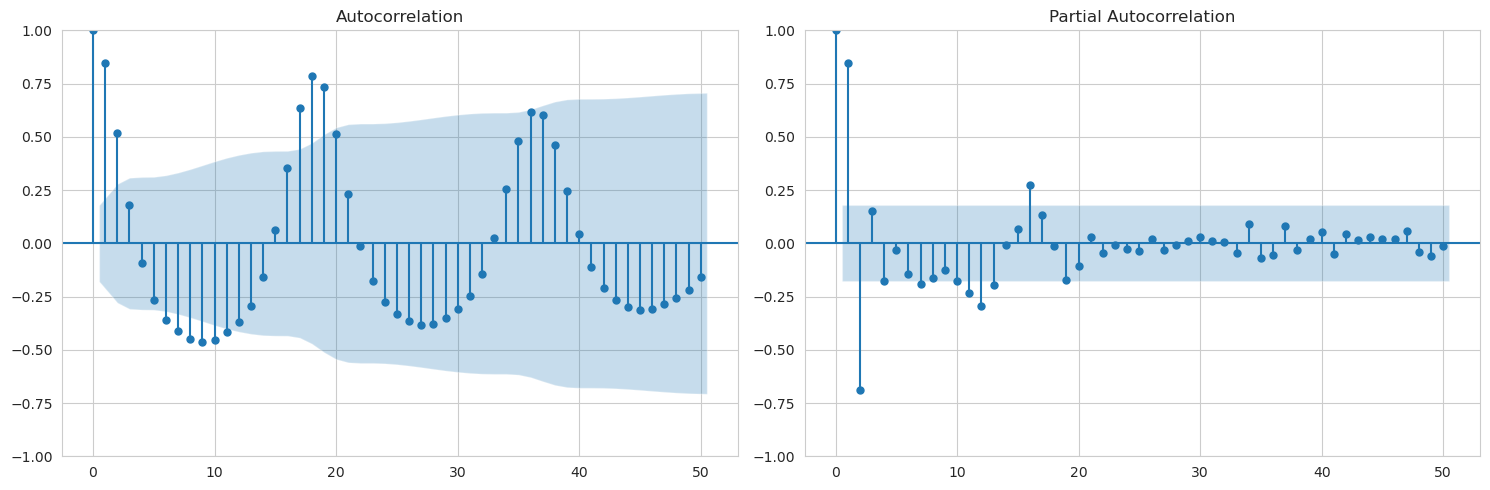

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

_ = sm.graphics.tsa.plot_acf(sr, ax=ax[0], lags=50)
_ = sm.graphics.tsa.plot_pacf(sr, method='ywm', ax=ax[1], lags=50)


fig.tight_layout()

In [59]:
ar2 = sm.tsa.ARIMA(sr.values[:100], order=(2,0,0)).fit()

In [60]:
ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -411.347
Date:                Tue, 07 Feb 2023   AIC                            830.694
Time:                        15:04:23   BIC                            841.114
Sample:                             0   HQIC                           834.911
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8210      9.050      0.312      0.755     -14.917      20.559
ar.L1          1.5023      0.056     26.639      0.000       1.392       1.613
ar.L2         -0.7493      0.071    -10.539      0.000      -0.889      -0.610
sigma2       212.5603     36.417      5.837      0.000     141.184     283.937
===================================================================================
Ljung-Box (L1) (Q):                   5.19   Jarque-Bera (JB):                37.15
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                             1.23
Prob(H) (two-sided):                  0.47   Kurtosis:                         4.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

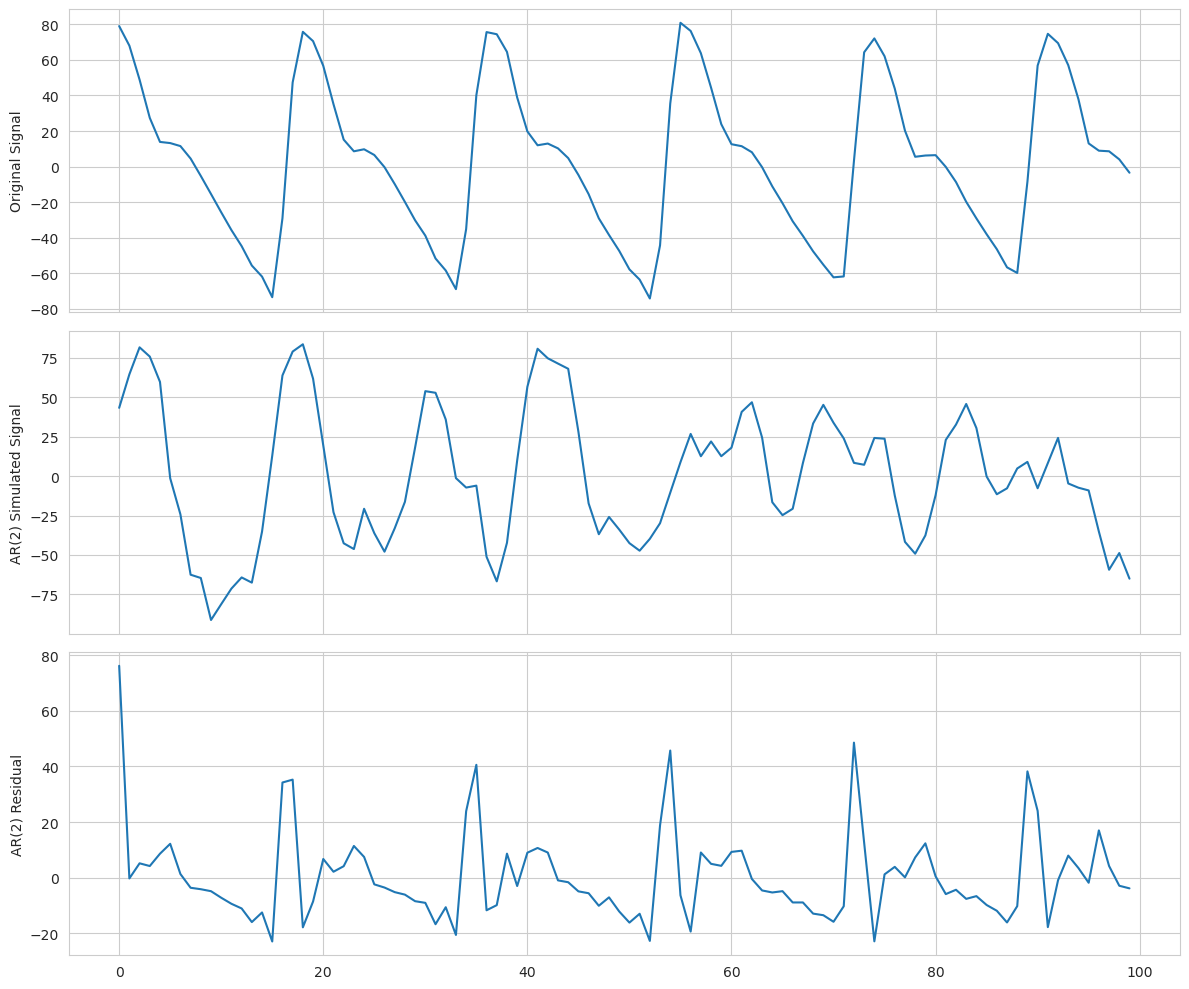

In [85]:
np.random.seed(4123124)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10), sharex=True)

sr.reset_index(drop=True).iloc[:100].plot(ax=ax[0])
ax[1].plot(ar2.simulate(nsimulations=100))
ax[2].plot(ar2.resid)

ax[0].set_ylabel('Original Signal')
ax[1].set_ylabel('AR(2) Simulated Signal')
ax[2].set_ylabel('AR(2) Residual')

fig.tight_layout()

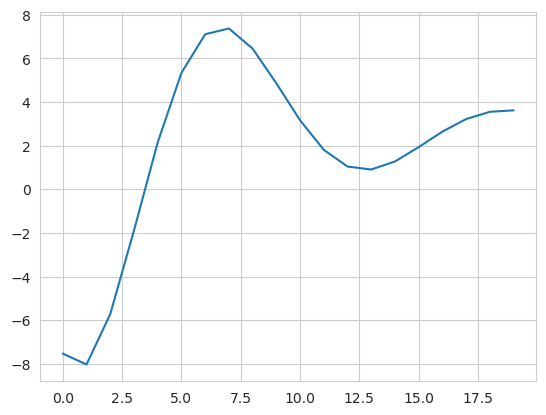

In [102]:
plt.plot(ar2.predict(start=100, end=120-1))

<AxesSubplot:>

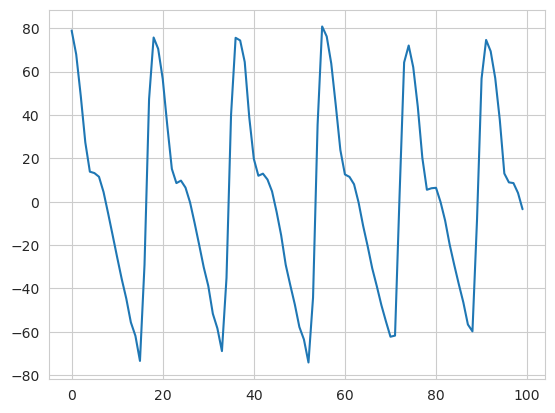

In [94]:
sr.reset_index(drop=True).iloc[:100].plot()